In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_digits
from numpy.random import choice
from sklearn.metrics import pairwise_distances_argmin, pairwise_distances, accuracy_score
import random
from sklearn.metrics import adjusted_rand_score, silhouette_samples, roc_auc_score
from scipy.stats import entropy
import pandas as pd
from scipy.stats import mode
from tqdm import tqdm

In [2]:
def add_dist(n_clusters, clust_labels, target_labels):
    true_list = []
    false_list = []
    entropy_true_res = []
    entropy_false_res = []
    for it in range(n_clusters):
        true_list = list(
            target_labels[clust_labels == it] == it
        ) + [True]
        false_list = list(
            target_labels[clust_labels == it] == it
        ) + [False]
        entropy_true_res.append(entropy(true_list))
        entropy_false = entropy(false_list)
        if str(entropy_false) == "nan":
            entropy_false_res.append(0)
        else:
            entropy_false_res.append(entropy_false)
    return entropy_true_res, entropy_false_res

## Базовая реализация k-means

In [3]:
def kmeans_find_clusters(X, n_clusters, iter_num=50):
    # 1. Randomly choose clusters

    ind = np.random.permutation(X.shape[0])[:n_clusters]
    centers = X[ind]
    
    for _ in range(iter_num):
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

In [4]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [5]:
centers, labels = kmeans_find_clusters(digits.data, n_clusters=10, iter_num=50)
centers.shape

(10, 64)

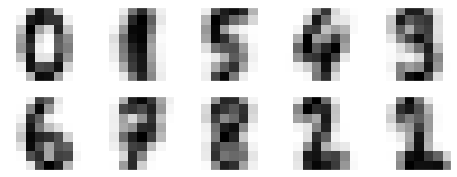

In [6]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers_img = centers.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers_img):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

## Точность кластеризации с помощью accuracy

In [7]:
from scipy.stats import mode

labels_dig = np.zeros_like(labels)
for i in range(10):
    mask = (labels == i)
    labels_dig[mask] = mode(digits.target[mask])[0]
    
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels_dig)

0.7790762381747357

##  Adjusted Rand index

In [8]:
adjusted_rand_score(digits.target, labels_dig)

0.6442511116588939

## Silhouette Coefficient

In [9]:
np.mean(silhouette_samples(digits.data, labels))

0.17756477757478153

## K++ means

In [10]:
def get_centers(X, n_clusters, iter_num=50, ind_rand = True):
    # 1. Randomly choose 1 center
    if ind_rand:
        ind = random.randint(0, len(X) - 1)
    else:
        ind = 0
    # 1. Randomly choose 1 center
    centers = [X[ind]]
    distance = np.array(cdist(X, centers)).T #distances between centers and points
    min_distance_1 = distance[0] #distances to the closest centers
    
    for i in range(1, n_clusters):
        distance = np.array(cdist(X, centers)).T
        min_distance = distance[0]
        for j in range(len(distance)):
            for k in range(len(min_distance)):
                min_distance[k] = min(min_distance[k], distance[j][k])
        min_distance = np.array(min_distance)**2
        indexes = np.arange(0, len(X))
        tmp = choice(indexes, p=min_distance/np.sum(min_distance)) #choose with prob=distance^2
        centers.append(X[tmp]) # add new center
    return centers
# lst_centers = get_centers(X, n_clusters, iter_num=50, ind_rand = True)

In [11]:
def k_plusplus_means_find_clusters(X, n_clusters, lst_centers, iter_num=50, ind_rand = True):
    # 1. Randomly choose 1 center
    if ind_rand:
        ind = random.randint(0, len(X) - 1)
    else:
        ind = 0
    # 1. Randomly choose 1 center
    centers = [X[ind]]
    distance = np.array(cdist(X, centers)).T #distances between centers and points
    min_distance_1 = distance[0] #distances to the closest centers
    
    for i in range(1, n_clusters):
        distance = np.array(cdist(X, centers)).T
        min_distance = distance[0]
        for j in range(len(distance)):
            for k in range(len(min_distance)):
                min_distance[k] = min(min_distance[k], distance[j][k])
        min_distance = np.array(min_distance)**2
        indexes = np.arange(0, len(X))
        tmp = choice(indexes, p=min_distance/np.sum(min_distance)) #choose with prob=distance^2
        centers.append(X[tmp]) # add new center
#     centers = lst_centers

    
    for _ in range(iter_num):
        # 2a. Assign labels based on closest center
#         labels = pairwise_distances_argmin(X, centers)
        label = np.argmin(pairwise_distances(X, centers))
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers 
    
    return centers, labels

In [12]:
def k_plusplus_means_find_clusters(X, n_clusters, lst_centers, iter_num=50):
#     # 1. Randomly choose 1 center
#     ind = random.randint(0, len(X) - 1)
#     centers = [X[ind]]
#     distance = np.array(cdist(X, centers)).T #distances between centers and points
#     min_distance_1 = distance[0] #distances to the closest centers
    
#     for i in range(1, n_clusters):
#         distance = np.array(cdist(X, centers)).T
#         min_distance = distance[0]
#         for j in range(len(distance)):
#             for k in range(len(min_distance)):
#                 min_distance[k] = min(min_distance[k], distance[j][k])
#         min_distance = np.array(min_distance)**2
#         indexes = np.arange(0, len(X))
#         tmp = choice(indexes, p=min_distance/np.sum(min_distance)) #choose with prob=distance^2
#         centers.append(X[tmp]) # add new center
    centers = lst_centers

    
    for _ in range(iter_num):
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

In [13]:
def k_plusplus_means_find_clusters_wuth_entropy(X, n_clusters, target_labels, lst_centers, iter_num=50, alpha = 0):
#     # 1. Randomly choose 1 center
#     if ind_rand:
#         ind = random.randint(0, len(X) - 1)
#     else:
#         ind = 0
#     # 1. Randomly choose 1 center
#     centers = [X[ind]]
#     distance = np.array(cdist(X, centers)).T #distances between centers and points
#     min_distance_1 = distance[0] #distances to the closest centers
    
#     for i in range(1, n_clusters):
#         distance = np.array(cdist(X, centers)).T
#         min_distance = distance[0]
#         for j in range(len(distance)):
#             for k in range(len(min_distance)):
#                 min_distance[k] = min(min_distance[k], distance[j][k])
#         min_distance = np.array(min_distance)**2
#         indexes = np.arange(0, len(X))
#         tmp = choice(indexes, p=min_distance/np.sum(min_distance)) #choose with prob=distance^2
#         centers.append(X[tmp]) # add new center
    centers = lst_centers

    
    for _ in range(iter_num):

        if _ == 0:
            # 2a. Assign labels based on closest center
            labels = pairwise_distances_argmin(X, centers)

            # 2b. Find new centers from means of points
            new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

            # 2c. Check for convergence
            if np.all(centers == new_centers):
                break
            centers = new_centers
            old_labels = labels
        else:

            # 2a. Assign labels based on closest center
            entropy_true_res, entropy_false_res = \
                add_dist(n_clusters, old_labels, target_labels)
            
            entropy_df = pd.DataFrame([], columns=range(n_clusters))
            
            for it in range(n_clusters):
                entropy_df[it] = ((target_labels == it)*entropy_true_res[it]\
                + (target_labels != it)*entropy_false_res[it])
                
            dist_to_centers = pd.DataFrame(pairwise_distances(X, centers))\
                + alpha * entropy_df

    #         labels = pairwise_distances_argmin(X, centers)
            labels = np.argmin(np.array(dist_to_centers), axis = 1)

            # 2b. Find new centers from means of points
            new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

            # 2c. Check for convergence
            if np.all(centers == new_centers):
                break
            centers = new_centers
            old_labels = labels
    
    return centers, labels

## Датасет MNIST

In [14]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [15]:
initial_centers = get_centers(digits.data, n_clusters=10, iter_num=50, ind_rand = True)

In [16]:
centers, labels = k_plusplus_means_find_clusters(digits.data, lst_centers = initial_centers, n_clusters=10, iter_num=50)
centers.shape

(10, 64)

In [17]:
labels_dig = np.zeros_like(labels)
for i in range(10):
    mask = (labels == i)
    labels_dig[mask] = mode(digits.target[mask])[0]

print(accuracy_score(digits.target, labels_dig))

0.7390094602114635


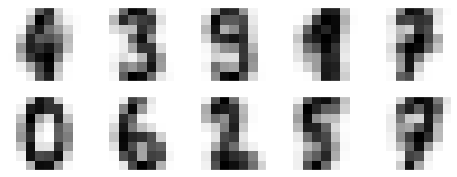

In [18]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers_img = centers.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers_img):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [19]:
lst_tmp1 = np.array([random.randint(0, 1) for x in range(10)])
lst_tmp2 = np.array([random.randint(0, 1) for x in range(10)])
lst_tmp3 = np.array([random.randint(0, 1) for x in range(10)])

lst_tmp1

lst_tmp2

lst_tmp3

lst_tmp_all = []
lst_tmp_all.append(lst_tmp2)
lst_tmp_all.append(lst_tmp1)
# lst_tmp_all.append(lst_tmp3)

np.max(np.array(lst_tmp_all), axis = 0)

u, indices = np.unique(np.array(lst_tmp_all), return_inverse=True)
axis = 0
u[np.argmax(np.apply_along_axis(np.bincount, axis, indices.reshape(np.array(lst_tmp_all).shape),
                                None, np.max(indices) + 1), axis=axis)]

u, indices = np.unique(np.array(lst_tmp_all), return_inverse=True)
axis = 0
u[np.argmax(np.apply_along_axis(np.bincount, axis, indices.reshape(np.array(lst_tmp_all).shape),
                                None, np.max(indices) + 1), axis=axis)]

labels_dig[:10]

array([0, 4, 1, 3, 4, 9, 6, 7, 9, 9])

In [20]:
def bootstrap_data(data_array, is_bootsrp = True):
    data_res = []
    n = len(data_array)
    inds = []
    if is_bootsrp:
        for i in range(n):
            j = random.randint(0, n - 1)
            inds.append(j)
            data_res.append(data_array[j])
    else:
        new_n = int(np.round((1 - 1/np.exp(1))*n))

        inds = random.sample(range(n), new_n)
        data_res = data_array[inds]
            
    return inds, np.array(data_res)

In [21]:
int(np.round((1 - 1/np.exp(1))*len(digits.data)))

1136

In [23]:
rand_sample = random.sample(range(10), 5)

In [24]:
def moda_func(data_array, axis = 0):
    u, indices = np.unique(data_array, return_inverse=True)
    res = u[np.argmax(np.apply_along_axis(np.bincount, axis, indices.reshape(data_array.shape),
                                    None, np.max(indices) + 1), axis=axis)]
    return res

In [25]:
%%capture --no-stdout --no-display
target_labels = digits.target
alpha_lst = [0, 0.01, 0.1, 1, 5, 10, 100]
df_res = pd.DataFrame(alpha_lst, columns = ["alpha"])
bootstrap_const = 10 
lst_res = []
df_bootstrap_res = pd.DataFrame(range(len(digits.data)), columns = ["res"])

for it in range(bootstrap_const):
    inds, data_bootstr = bootstrap_data(digits.data)
    data_bootstr = digits.data
    initial_centers = get_centers(data_bootstr, n_clusters=10, iter_num=50, ind_rand = True)
    lst_acc = []
    lst_labels = []
    
    for alpha in alpha_lst:
#         print(alpha)
        try:
            centers, labels = k_plusplus_means_find_clusters_wuth_entropy(
                data_bootstr, n_clusters=10, lst_centers = initial_centers, target_labels = target_labels, iter_num=50, alpha = alpha
            )


            labels_dig = np.zeros_like(labels)
            for i in range(10):
                mask = (labels == i)
                labels_dig[mask] = mode(digits.target[mask])[0]
            
            acc_score = accuracy_score(digits.target, labels_dig)
            lst_acc.append(np.round(acc_score, 4))
#             print(acc_score)
        except:
#             print("ERROR")
            lst_acc.append("ERROR")
        lst_labels.append(labels_dig)
        
        df_bootstr_it = pd.DataFrame([inds, labels_dig]).T
        df_bootstr_it.columns = ["inds", "labels"]
        df_bootstr_value_counts = df_bootstr_it\
            .groupby(['inds'])\
            .agg({
                'labels' : [lambda x:x.value_counts().index[0]]
            }).reset_index()
        df_bootstrap_res = df_bootstrap_res.merge(
            df_bootstr_value_counts, on = "inds", how = "left"
        )
    lst_res.append(lst_labels)
    df_res[it] = lst_acc

bagging_label = moda_func(np.array(lst_labels))
bagging_score = accuracy_score(digits.target, bagging_label)
df_res["bagging"] = bagging_score
display(df_res)
# НАДО ДОПИСИТЬ

KeyError: 'inds'

In [37]:
def cluster_union(clusters, targets):
    unique_clusters = sorted(pd.Series(clusters).unique())
    df = pd.DataFrame([list(clusters), list(targets)]).T
    df.columns = ["clusters", "targets"]
    dct_res = {}
    for i in unique_clusters:
        dct_res[i] = df[df.clusters == i]\
            .groupby("clusters")\
            .agg({
                'targets' : lambda x:x.value_counts().index[0]
            })\
            .rename({"targets" : "cnt"}, axis = 1)\
            .reset_index()\
            .loc[0, "cnt"]


    return dct_res

In [ ]:
def kmeans_bootstrap():
    #         print(alpha)

    #        inds, data_bootstr = bootstrap_data(digits.data, False)
            inds = range(len(digits.data))
            data_bootstr = digits.data

            initial_centers = get_centers(data_bootstr, n_clusters=num_clusters, iter_num=num_iter, ind_rand = True)
    #         lst_acc = []
    #         lst_labels = []

            try:
                centers, labels = k_plusplus_means_find_clusters_wuth_entropy(
                    data_bootstr, n_clusters=num_clusters, lst_centers = initial_centers, target_labels = target_labels, iter_num=num_iter, alpha = alpha
                )

                dct_clusters_target = cluster_union(labels, digits.target)

                labels = np.array(pd.Series(labels).map(dct_clusters_target))

                labels_dig = np.zeros_like(labels)
                for i in range(num_clusters):
                    mask = (labels == i)
                    labels_dig[mask] = mode(digits.target[mask])[0]

    #             acc_score = accuracy_score(digits.target, labels_dig)
    #             lst_acc.append(np.round(acc_score, 4))
    #             print(acc_score)
            except:
    #             print("ERROR")
    #             lst_acc.append("ERROR")
                pass
            lst_labels.append(labels_dig)

            df_bootstr_it = pd.DataFrame([inds, labels_dig]).T
            df_bootstr_it.columns = ["inds", "labels"]

            df_bootstr_value_counts = df_bootstr_it\
                .groupby(['inds'])\
                .agg({
                    'labels' : lambda x:x.value_counts().index[0]
                }).reset_index()

            df_bootstrap_res = df_bootstrap_res.merge(
                df_bootstr_value_counts.rename({"labels" : "labels_" + str(it)}, axis = 1)
                , on = "inds"
                , how = "left"
            )

На всей выборке

In [114]:
%%time
%%capture --no-stdout --no-display
target_labels = digits.target
alpha_lst = [0, 0.1, 1, 10]
# alpha_lst = [0, 100]
df_res = pd.DataFrame(alpha_lst, columns = ["alpha"])
bootstrap_const = 25
lst_res = []
num_clusters_lst = [10, 25, 50]
# num_clusters = 20
num_iter = 50

df_bootstrap_res = pd.DataFrame(range(len(digits.data)), columns = ["inds"])

for num_clusters in num_clusters_lst:
    lst_acc = []
    for alpha in alpha_lst:
        lst_labels = []
        for it in tqdm(range(bootstrap_const)):
    #         print(alpha)

    #        inds, data_bootstr = bootstrap_data(digits.data, False)
            inds = range(len(digits.data))
            data_bootstr = digits.data

            initial_centers = get_centers(data_bootstr, n_clusters=num_clusters, iter_num=num_iter, ind_rand = True)
    #         lst_acc = []
    #         lst_labels = []

            try:
                centers, labels = k_plusplus_means_find_clusters_wuth_entropy(
                    data_bootstr, n_clusters=num_clusters, lst_centers = initial_centers, target_labels = target_labels, iter_num=num_iter, alpha = alpha
                )

                dct_clusters_target = cluster_union(labels, digits.target)

                labels = np.array(pd.Series(labels).map(dct_clusters_target))

                labels_dig = np.zeros_like(labels)
                for i in range(num_clusters):
                    mask = (labels == i)
                    labels_dig[mask] = mode(digits.target[mask])[0]

    #             acc_score = accuracy_score(digits.target, labels_dig)
    #             lst_acc.append(np.round(acc_score, 4))
    #             print(acc_score)
            except:
    #             print("ERROR")
    #             lst_acc.append("ERROR")
                pass
#             lst_labels.append(labels_dig)

            df_bootstr_it = pd.DataFrame([inds, labels_dig]).T
            df_bootstr_it.columns = ["inds", "labels"]

            df_bootstr_value_counts = df_bootstr_it\
                .groupby(['inds'])\
                .agg({
                    'labels' : lambda x:x.value_counts().index[0]
                }).reset_index()

            df_bootstrap_res = df_bootstrap_res.merge(
                df_bootstr_value_counts.rename({"labels" : "labels_" + str(it)}, axis = 1)
                , on = "inds"
                , how = "left"
            )

        df_bootstrap_res["total_labels"] = df_bootstrap_res.drop("inds", axis = 1).mode(axis = 1)[0]
        df_bootstrap_res["target"] = digits.target

        acc_score = accuracy_score(digits.target, df_bootstrap_res["total_labels"])
        lst_acc.append(np.round(acc_score, 4))

    #     lst_res.append(lst_labels)
    df_res["clusters_" + str(num_clusters)] = lst_acc

    # bagging_label = moda_func(np.array(lst_labels))
    # bagging_score = accuracy_score(digits.target, bagging_label)
    # df_res["bagging"] = bagging_score
    # display(df_res)
    # НАДО ДОПИСИТЬ

CPU times: user 20min 40s, sys: 5.77 s, total: 20min 46s
Wall time: 19min 35s


In [115]:
df_res

,alpha,clusters_10,clusters_25,clusters_50
0,0.0,0.7284,0.8431,0.9188
1,0.1,0.7785,0.8926,0.9338
2,1.0,0.7668,0.9026,0.9410
3,10.0,0.8136,0.9104,0.9444


In [116]:
df_res.to_csv("All_sample.csv")

In [117]:
df_res_all = df_res.copy()

Bagging

In [118]:
%%time
%%capture --no-stdout --no-display
target_labels = digits.target
alpha_lst = [0, 0.1, 1, 10]
# alpha_lst = [0, 100]
df_res = pd.DataFrame(alpha_lst, columns = ["alpha"])
bootstrap_const = 25
lst_res = []
num_clusters_lst = [10, 25, 50]
# num_clusters = 20
num_iter = 50

df_bootstrap_res = pd.DataFrame(range(len(digits.data)), columns = ["inds"])

for num_clusters in num_clusters_lst:
    lst_acc = []
    for alpha in alpha_lst:
        lst_labels = []
        for it in tqdm(range(bootstrap_const)):
    #         print(alpha)

            inds, data_bootstr = bootstrap_data(digits.data, True)
#             inds = range(len(digits.data))
#             data_bootstr = digits.data

            initial_centers = get_centers(data_bootstr, n_clusters=num_clusters, iter_num=num_iter, ind_rand = True)
    #         lst_acc = []
    #         lst_labels = []

            try:
                centers, labels = k_plusplus_means_find_clusters_wuth_entropy(
                    data_bootstr, n_clusters=num_clusters, lst_centers = initial_centers, target_labels = target_labels, iter_num=num_iter, alpha = alpha
                )

                dct_clusters_target = cluster_union(labels, digits.target)

                labels = np.array(pd.Series(labels).map(dct_clusters_target))

                labels_dig = np.zeros_like(labels)
                for i in range(num_clusters):
                    mask = (labels == i)
                    labels_dig[mask] = mode(digits.target[mask])[0]

    #             acc_score = accuracy_score(digits.target, labels_dig)
    #             lst_acc.append(np.round(acc_score, 4))
    #             print(acc_score)
            except:
    #             print("ERROR")
    #             lst_acc.append("ERROR")
                pass
#             lst_labels.append(labels_dig)

            df_bootstr_it = pd.DataFrame([inds, labels_dig]).T
            df_bootstr_it.columns = ["inds", "labels"]

            df_bootstr_value_counts = df_bootstr_it\
                .groupby(['inds'])\
                .agg({
                    'labels' : lambda x:x.value_counts().index[0]
                }).reset_index()

            df_bootstrap_res = df_bootstrap_res.merge(
                df_bootstr_value_counts.rename({"labels" : "labels_" + str(it)}, axis = 1)
                , on = "inds"
                , how = "left"
            )

        df_bootstrap_res["total_labels"] = df_bootstrap_res.drop("inds", axis = 1).mode(axis = 1)[0]
        df_bootstrap_res["target"] = digits.target

        acc_score = accuracy_score(digits.target, df_bootstrap_res["total_labels"])
        lst_acc.append(np.round(acc_score, 4))

    #     lst_res.append(lst_labels)
    df_res["clusters_" + str(num_clusters)] = lst_acc

    # bagging_label = moda_func(np.array(lst_labels))
    # bagging_score = accuracy_score(digits.target, bagging_label)
    # df_res["bagging"] = bagging_score
    # display(df_res)
    # НАДО ДОПИСИТЬ

CPU times: user 16min 16s, sys: 3.81 s, total: 16min 20s
Wall time: 15min 29s


In [119]:
df_res.to_csv("Bagging_sample.csv")

In [120]:
df_res_bagging = df_res.copy()

In [121]:
df_res

,alpha,clusters_10,clusters_25,clusters_50
0,0.0,0.1052,0.1853,0.1046
1,0.1,0.2042,0.1541,0.0979
2,1.0,0.2081,0.1241,0.0940
3,10.0,0.1959,0.1024,0.0957


Bagging without duplicates

In [122]:
%%time
%%capture --no-stdout --no-display
target_labels = digits.target
alpha_lst = [0, 0.1, 1, 10]
# alpha_lst = [0, 100]
df_res = pd.DataFrame(alpha_lst, columns = ["alpha"])
bootstrap_const = 25
lst_res = []
num_clusters_lst = [10, 25, 50]
# num_clusters = 20
num_iter = 50

df_bootstrap_res = pd.DataFrame(range(len(digits.data)), columns = ["inds"])

for num_clusters in num_clusters_lst:
    lst_acc = []
    for alpha in alpha_lst:
        lst_labels = []
        for it in tqdm(range(bootstrap_const)):
    #         print(alpha)

            inds, data_bootstr = bootstrap_data(digits.data, False)
#             inds = range(len(digits.data))
#             data_bootstr = digits.data

            initial_centers = get_centers(data_bootstr, n_clusters=num_clusters, iter_num=num_iter, ind_rand = True)
    #         lst_acc = []
    #         lst_labels = []

            try:
                centers, labels = k_plusplus_means_find_clusters_wuth_entropy(
                    data_bootstr, n_clusters=num_clusters, lst_centers = initial_centers, target_labels = target_labels, iter_num=num_iter, alpha = alpha
                )

                dct_clusters_target = cluster_union(labels, digits.target)

                labels = np.array(pd.Series(labels).map(dct_clusters_target))

                labels_dig = np.zeros_like(labels)
                for i in range(num_clusters):
                    mask = (labels == i)
                    labels_dig[mask] = mode(digits.target[mask])[0]

    #             acc_score = accuracy_score(digits.target, labels_dig)
    #             lst_acc.append(np.round(acc_score, 4))
    #             print(acc_score)
            except:
    #             print("ERROR")
    #             lst_acc.append("ERROR")
                pass
#             lst_labels.append(labels_dig)

            df_bootstr_it = pd.DataFrame([inds, labels_dig]).T
            df_bootstr_it.columns = ["inds", "labels"]

            df_bootstr_value_counts = df_bootstr_it\
                .groupby(['inds'])\
                .agg({
                    'labels' : lambda x:x.value_counts().index[0]
                }).reset_index()

            df_bootstrap_res = df_bootstrap_res.merge(
                df_bootstr_value_counts.rename({"labels" : "labels_" + str(it)}, axis = 1)
                , on = "inds"
                , how = "left"
            )

        df_bootstrap_res["total_labels"] = df_bootstrap_res.drop("inds", axis = 1).mode(axis = 1)[0]
        df_bootstrap_res["target"] = digits.target

        acc_score = accuracy_score(digits.target, df_bootstrap_res["total_labels"])
        lst_acc.append(np.round(acc_score, 4))

    #     lst_res.append(lst_labels)
    df_res["clusters_" + str(num_clusters)] = lst_acc

    # bagging_label = moda_func(np.array(lst_labels))
    # bagging_score = accuracy_score(digits.target, bagging_label)
    # df_res["bagging"] = bagging_score
    # display(df_res)
    # НАДО ДОПИСИТЬ

CPU times: user 10min 1s, sys: 2.85 s, total: 10min 4s
Wall time: 9min 56s


In [123]:
df_res

,alpha,clusters_10,clusters_25,clusters_50
0,0.0,0.0946,0.1436,0.1441
1,0.1,0.1603,0.1447,0.1386
2,1.0,0.1558,0.1436,0.1347
3,10.0,0.1452,0.1441,0.1319


In [124]:
df_res.to_csv("Bagging_without_duplicates_sample.csv")

In [125]:
df_res_bagging_without_duplicates = df_res.copy()

Ансамбль по семплам без одного класса

In [126]:
%%time
%%capture --no-stdout --no-display
target_labels = digits.target
alpha_lst = [0, 0.1, 1, 10]
# alpha_lst = [0, 100]
df_res = pd.DataFrame(alpha_lst, columns = ["alpha"])
bootstrap_const = 10
lst_res = []
num_clusters_lst = [10, 25, 50]
# num_clusters = 20
num_iter = 50
df_target = pd.DataFrame([range(len(digits.data)), digits.target]).T
df_target.columns = ["inds", "target"]

df_bootstrap_res = pd.DataFrame(range(len(digits.data)), columns = ["inds"])

for num_clusters in num_clusters_lst:
    lst_acc = []
    for alpha in alpha_lst:
        lst_labels = []
        for it in tqdm(range(bootstrap_const)):
    #         print(alpha)
            df_not_all_targets = df_target[df_target.target != it].copy()
            inds = df_not_all_targets["inds"]
            data_bootstr = df_not_all_targets.copy()

#             inds, data_bootstr = bootstrap_data(digits.data, False)
#             inds = range(len(digits.data))
#             data_bootstr = digits.data

            data_bootstr = digits.data
            initial_centers = get_centers(data_bootstr, n_clusters=num_clusters, iter_num=num_iter, ind_rand = True)
    #         lst_acc = []
    #         lst_labels = []

            try:
                centers, labels = k_plusplus_means_find_clusters_wuth_entropy(
                    data_bootstr, n_clusters=num_clusters, lst_centers = initial_centers, target_labels = target_labels, iter_num=num_iter, alpha = alpha
                )

                dct_clusters_target = cluster_union(labels, digits.target)

                labels = np.array(pd.Series(labels).map(dct_clusters_target))

                labels_dig = np.zeros_like(labels)
                for i in range(num_clusters):
                    mask = (labels == i)
                    labels_dig[mask] = mode(digits.target[mask])[0]

    #             acc_score = accuracy_score(digits.target, labels_dig)
    #             lst_acc.append(np.round(acc_score, 4))
    #             print(acc_score)
            except:
    #             print("ERROR")
    #             lst_acc.append("ERROR")
                pass
#             lst_labels.append(labels_dig)

            df_bootstr_it = pd.DataFrame([inds, labels_dig]).T
            df_bootstr_it.columns = ["inds", "labels"]

            df_bootstr_value_counts = df_bootstr_it\
                .groupby(['inds'])\
                .agg({
                    'labels' : lambda x:x.value_counts().index[0]
                }).reset_index()

            df_bootstrap_res = df_bootstrap_res.merge(
                df_bootstr_value_counts.rename({"labels" : "labels_" + str(it)}, axis = 1)
                , on = "inds"
                , how = "left"
            )

        df_bootstrap_res["total_labels"] = df_bootstrap_res.drop("inds", axis = 1).mode(axis = 1)[0]
        df_bootstrap_res["target"] = digits.target

        acc_score = accuracy_score(digits.target, df_bootstrap_res["total_labels"])
        lst_acc.append(np.round(acc_score, 4))

    #     lst_res.append(lst_labels)
    df_res["clusters_" + str(num_clusters)] = lst_acc

    # bagging_label = moda_func(np.array(lst_labels))
    # bagging_score = accuracy_score(digits.target, bagging_label)
    # df_res["bagging"] = bagging_score
    # display(df_res)
    # НАДО ДОПИСИТЬ

CPU times: user 11min, sys: 3.21 s, total: 11min 4s
Wall time: 10min 40s


In [127]:
df_res

,alpha,clusters_10,clusters_25,clusters_50
0,0.0,0.7769,0.8692,0.9193
1,0.1,0.7841,0.9015,0.9271
2,1.0,0.7802,0.9093,0.9393
3,10.0,0.7346,0.9104,0.9421


In [128]:
df_res.to_csv("Ensemble_not_all_classes_sample.csv")

In [129]:
df_res_not_all_classes = df_res.copy()

In [62]:
lst_acc

[0.892, 0.9037]

In [42]:
centers, labels = k_plusplus_means_find_clusters_wuth_entropy(
                data_bootstr, n_clusters=num_clusters, lst_centers = initial_centers, target_labels = target_labels, iter_num=num_iter, alpha = alpha
            )

/home/mahir/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2686: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
/home/mahir/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2686: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
/home/mahir/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2686: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
/home/mahir/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2686: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
/home/mahir/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2686: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, 

In [44]:
clusters = labels
targets = digits.target
unique_clusters = sorted(pd.Series(clusters).unique())
df = pd.DataFrame([list(clusters), list(targets)]).T
df.columns = ["clusters", "targets"]
dct_res = {}
for i in unique_clusters:
    dct_res[i] = df[df.clusters == i]\
        .groupby("clusters")\
        .agg({
            'targets' : lambda x:x.value_counts().index[0]
        })\
        .rename({"targets" : "cnt"}, axis = 1)\
        .reset_index()\
        .loc[0, "cnt"]
    


In [45]:

dct_clusters_target = cluster_union(labels, digits.target)

labels = np.array(pd.Series(labels).map(dct_clusters_target))

labels_dig = np.zeros_like(labels)
for i in range(num_clusters):
    mask = (labels == i)
    labels_dig[mask] = mode(digits.target[mask])[0]


In [47]:
len(labels_dig)

1797

In [32]:
df[(df["clusters"] == 0)]\
        .groupby("clusters")\
        .agg({
            'targets' : lambda x:x.value_counts().index[0]
        })\
        .rename({"targets" : "cnt"}, axis = 1).reset_index()

,clusters,cnt
0,0,4


In [35]:
df[df.clusters == 1]\
        .groupby("clusters")\
        .agg({
            'targets' : lambda x:x.value_counts().index[0]
        })\
        .rename({"targets" : "cnt"}, axis = 1)\
        .reset_index()\
        .loc[0, "cnt"]

3

In [34]:
dct_res

{0: 4,
 1: 3,
 2: 7,
 3: 6,
 4: 1,
 5: 1,
 6: 0,
 7: 2,
 8: 0,
 9: 9,
 10: 5,
 11: 7,
 12: 4,
 13: 8,
 14: 4,
 15: 2,
 16: 9,
 17: 6,
 18: 5,
 19: 8}

In [ ]:
dct_clusters_target = cluster_union(labels, digits.target)

labels = pd.Series(labels).map(dct_clusters_target)

In [ ]:
type(labels)

In [ ]:
df_bootstrap_res.drop("inds", axis = 1).mode(axis = 1)

In [ ]:
df_bootstrap_res

In [ ]:
df_bootstrap_res.total_labels.unique()

In [ ]:
lst_acc

In [ ]:
df_bootstrap_res["total_labels"]

In [ ]:
lst_tmp = df_bootstrap_res.drop("inds", axis = 1).mode(axis = 1)[0]
lst_tmp[lst_tmp.isna()]

In [ ]:
df_bootstrap_res.drop("inds", axis = 1)

In [ ]:
%%time
print(len(inds), len(labels_dig))
df_bootstr_res = pd.DataFrame([inds, labels_dig]).T
df_bootstr_res.columns = ["inds", "labels"]
df_tmp = df_bootstr_res\
    .groupby(['inds'])\
    .agg({
        'labels' : [lambda x:x.value_counts().index[0], 'count']
    }).reset_index()
df_tmp

In [ ]:
df_bootstr_res[df_bootstr_res.inds == 1795]

In [ ]:
%%capture --no-display
display(df_res)

In [ ]:
bagging_label = moda_func(np.array(lst_labels))
bagging_score = accuracy_score(digits.target, bagging_label)
df_res["baging"] = bagging_score

In [ ]:
df_res

## Точность кластеризации с помощью accuracy

In [ ]:
target_labels = digits.target
alpha_lst = [0, 0.01, 0.1, 1, 5, 10, 100]
df_res = pd.DataFrame(alpha_lst, columns = ["alpha"])

for it in range(10):
    initial_centers = get_centers(digits.data, n_clusters=10, iter_num=50, ind_rand = True)
    lst_tmp = []
    for alpha in alpha_lst:
        print(alpha)
        try:
            centers, labels = k_plusplus_means_find_clusters_wuth_entropy(
                digits.data, n_clusters=10, lst_centers = initial_centers, target_labels = target_labels, iter_num=50, alpha = alpha
            )


            labels_dig = np.zeros_like(labels)
            for i in range(10):
                mask = (labels == i)
                labels_dig[mask] = mode(digits.target[mask])[0]
            
            acc_score = accuracy_score(digits.target, labels_dig)
            lst_tmp.append(np.round(acc_score, 4))
            print(acc_score)
        except:
            print("ERROR")
            lst_tmp.append("ERROR")
    df_res[it] = lst_tmp

In [ ]:
df_res

In [ ]:
df_res

In [ ]:
df_res.to_csv("clusterization_result_0308.csv")

## Adjusted Rand index

In [ ]:
adjusted_rand_score(digits.target, labels_dig)

## Silhouette Coefficient

In [ ]:
np.mean(silhouette_samples(digits.data, labels))